<a href="https://colab.research.google.com/github/kivandeavinash/Practice-or-DL/blob/main/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/csvjson (1).csv')
df.head()

,album,year,US_peak_chart_post
0,The White Stripes,1999,-
1,De Stijl,2000,-
2,White Blood Cells,2001,61
3,Elephant,2003,6
4,Get Behind Me Satan,2005,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   album               10 non-null     object
 1   year                10 non-null     int64 
 2   US_peak_chart_post  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
df.head()

,album,year,US_peak_chart_post
0,The White Stripes,1999,-
1,De Stijl,2000,-
2,White Blood Cells,2001,61
3,Elephant,2003,6
4,Get Behind Me Satan,2005,3


In [ ]:
# remove twitter handles (@user)
df['clean_album'] = np.vectorize(remove_pattern)(df['album'], "@[\w]*")

In [ ]:
df.head()

,album,year,US_peak_chart_post,clean_album
0,The White Stripes,1999,-,The White Stripes
1,De Stijl,2000,-,De Stijl
2,White Blood Cells,2001,61,White Blood Cells
3,Elephant,2003,6,Elephant
4,Get Behind Me Satan,2005,3,Get Behind Me Satan


In [ ]:
# remove special characters, numbers and punctuations
df['clean_album'] = df['clean_album'].str.replace("[^a-zA-Z#]", " ")
df.head()

,album,year,US_peak_chart_post,clean_album
0,The White Stripes,1999,-,The White Stripes
1,De Stijl,2000,-,De Stijl
2,White Blood Cells,2001,61,White Blood Cells
3,Elephant,2003,6,Elephant
4,Get Behind Me Satan,2005,3,Get Behind Me Satan


In [ ]:
# remove short words
df['clean_album'] = df['clean_album'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,album,year,US_peak_chart_post,clean_album
0,The White Stripes,1999,-,White Stripes
1,De Stijl,2000,-,Stijl
2,White Blood Cells,2001,61,White Blood Cells
3,Elephant,2003,6,Elephant
4,Get Behind Me Satan,2005,3,Behind Satan


In [ ]:
# individual words considered as tokens
tokenized_album = df['clean_album'].apply(lambda x: x.split())
tokenized_album.head()

0         [White, Stripes]
1                  [Stijl]
2    [White, Blood, Cells]
3               [Elephant]
4          [Behind, Satan]
Name: clean_album, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_album = tokenized_album.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_album.head()

0         [white, stripe]
1                 [stijl]
2    [white, blood, cell]
3                 [eleph]
4         [behind, satan]
Name: clean_album, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_album)):
    tokenized_album[i] = " ".join(tokenized_album[i])
    
df['clean_album'] = tokenized_album
df.head()

,album,year,US_peak_chart_post,clean_album
0,The White Stripes,1999,-,white stripe
1,De Stijl,2000,-,stijl
2,White Blood Cells,2001,61,white blood cell
3,Elephant,2003,6,eleph
4,Get Behind Me Satan,2005,3,behind satan


Exploratory Data Analysis

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


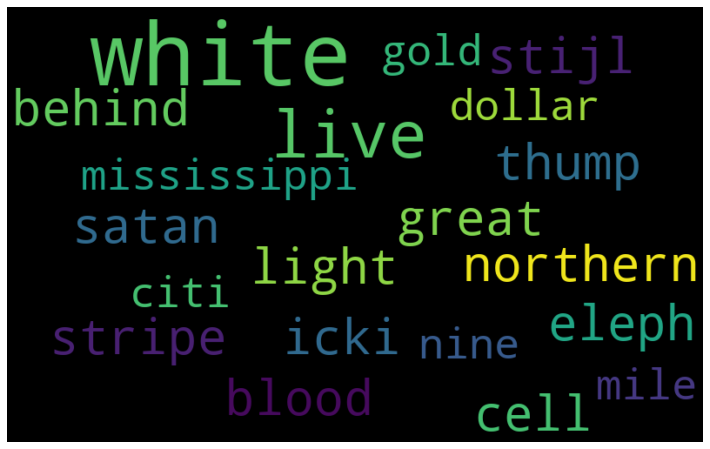

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_album']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()